In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('Test_OOA.xlsx', index_col = 0)

In [9]:
df

,Тип точки продаж,Кредит_1,Кредит_2,Kредит_3,Клиент_1,Клиент_2,Клиент_3,Клиент_4,Клиент_5,Клиент_6,Клиент_7,Флаг
ID заявки,,,,,,,,,,,,
1,2,10,5,5,1,2,0,7,1,12,16,0
2,7,3,1,6,2,3,1,7,4,10,15,0
3,7,10,1,6,2,4,1,7,4,11,20,0
4,7,4,1,10,1,7,1,7,4,8,19,0
5,7,6,1,10,2,6,1,7,4,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74401,7,4,3,10,2,3,0,7,2,11,1,0
74402,4,16,1,11,2,5,0,2,2,17,12,0
74403,2,8,2,6,1,2,0,4,4,8,13,0


Составим матрицу зависимостей

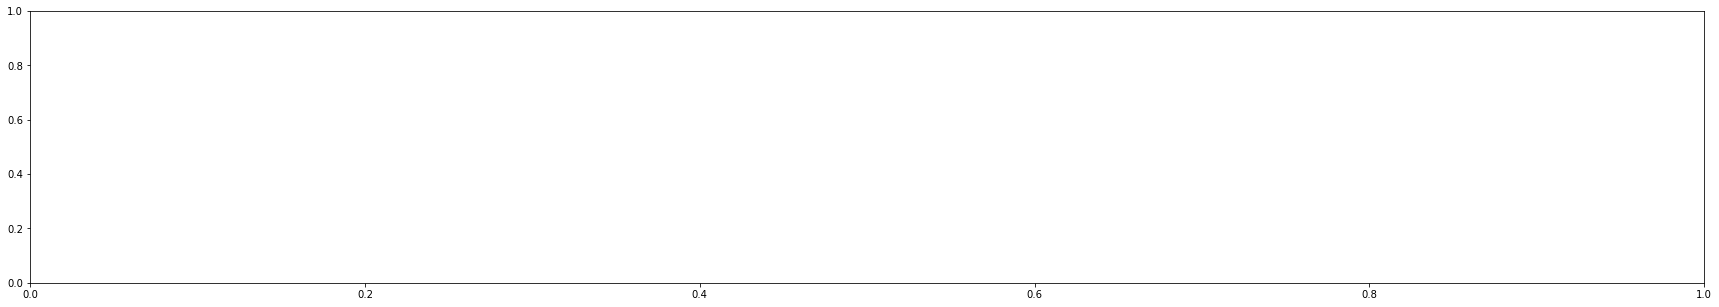

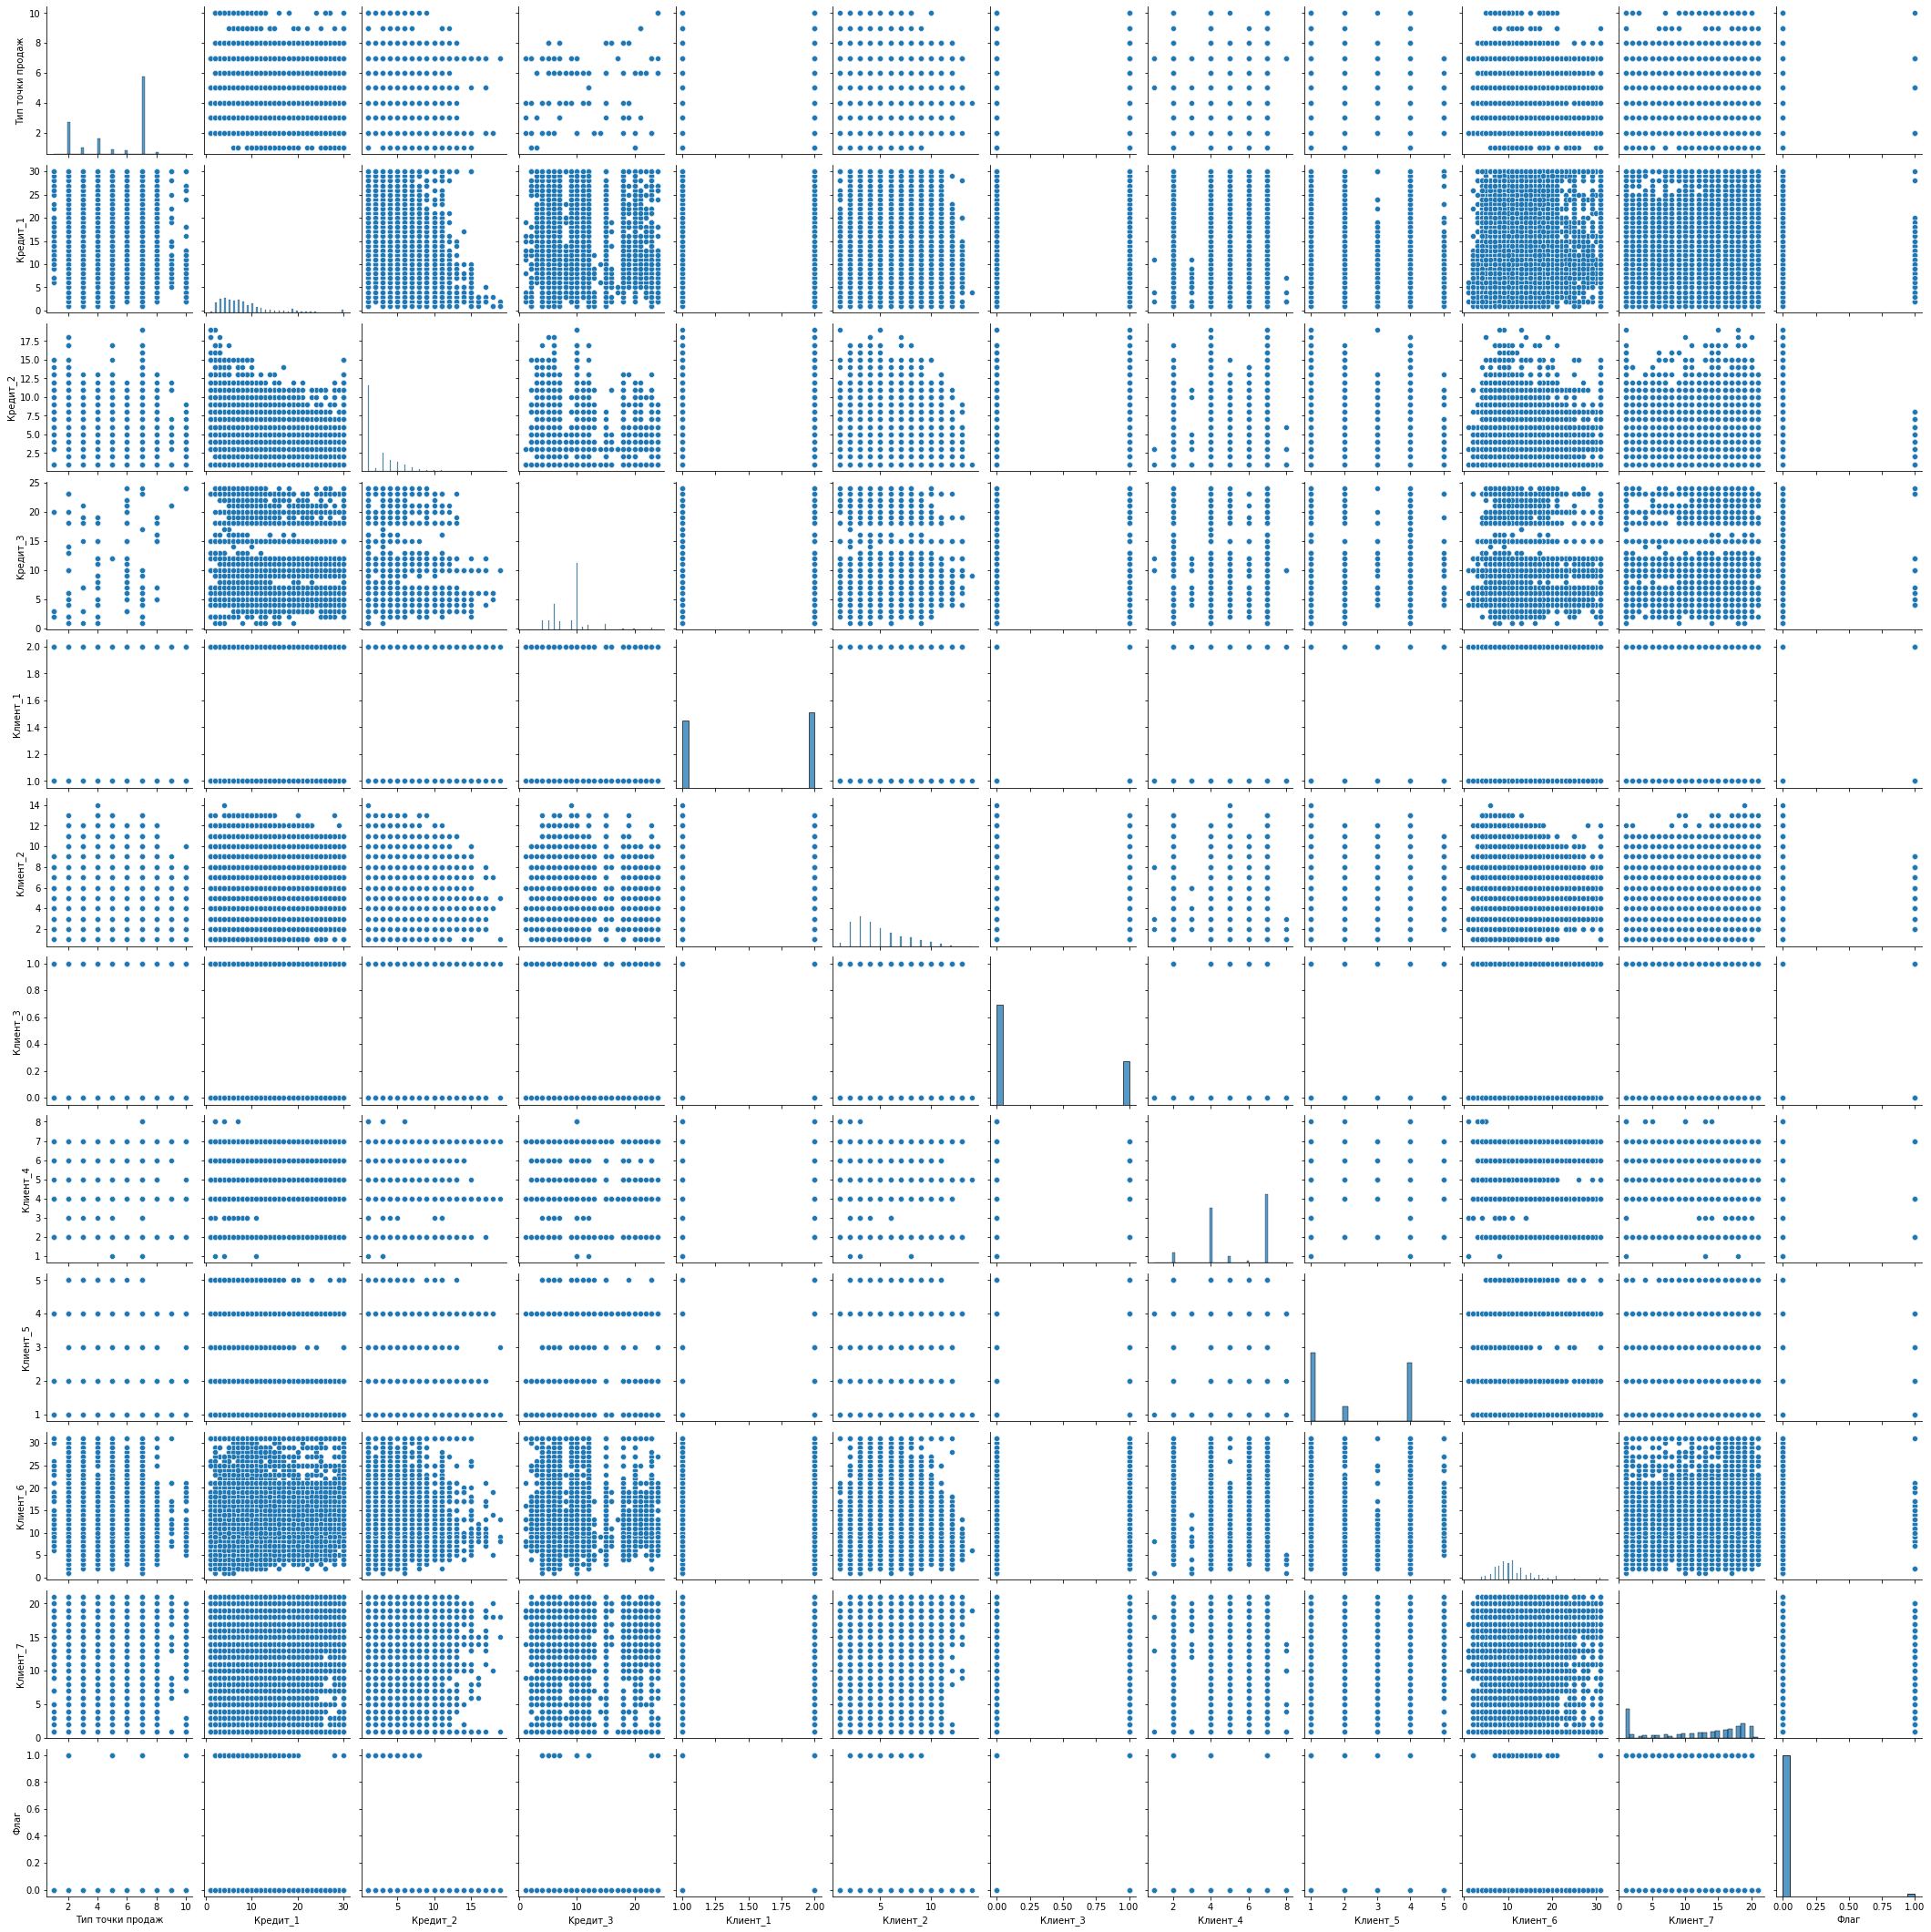

In [173]:
sns.pairplot(data = df)

Как видим, признаки 'Клиент_7' и 'Клиент_8' не имеют никакой закономерной связи с остальынми признаками и их стоит исключить

Из условий задач здесь прежде всего нас интересует зависимость значений Флаг от остальных. И как видно, есть определенные значения, при которых флаг равен нулю и не равен единице

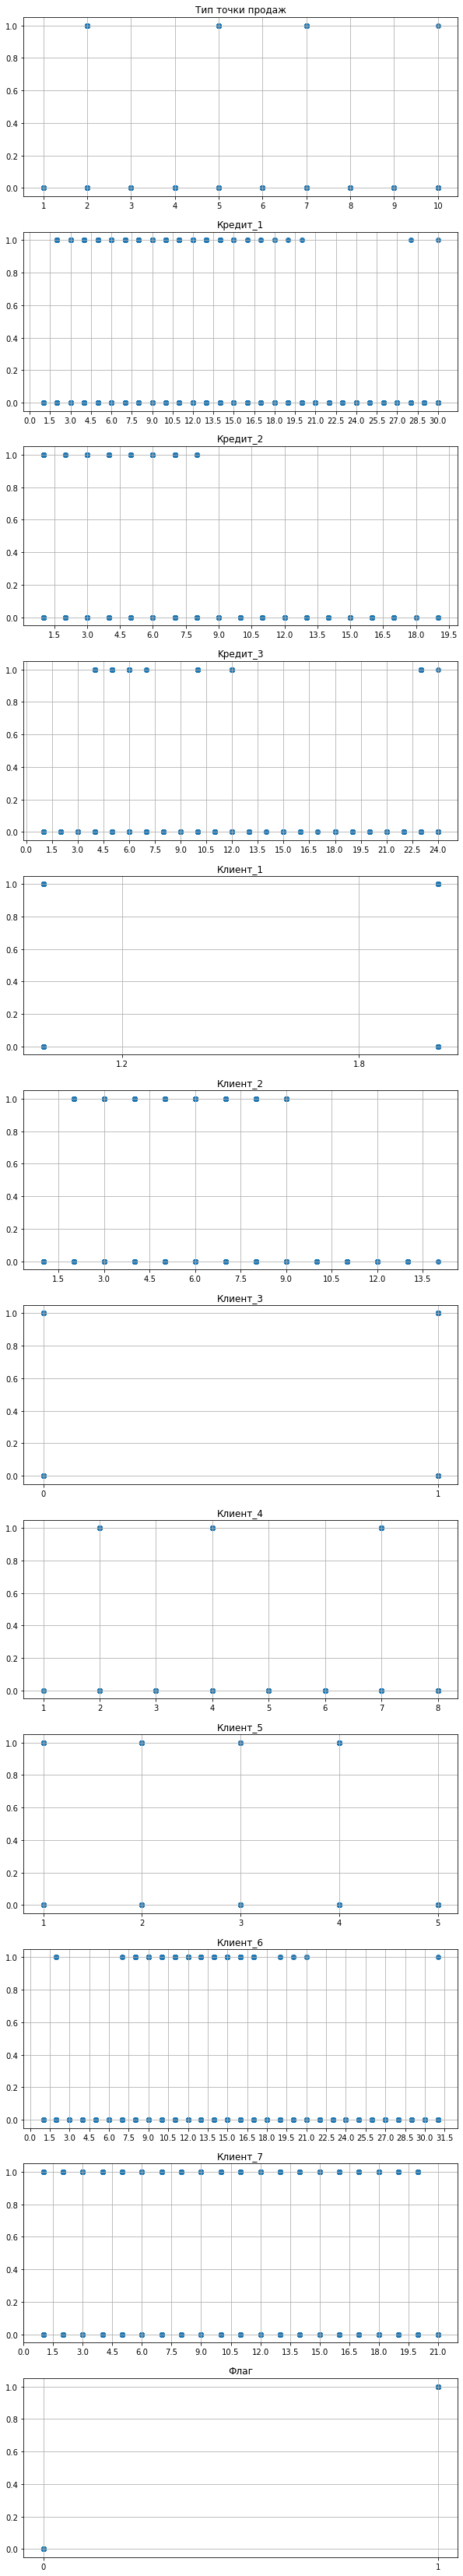

In [178]:

colls = df.columns
n = len(colls)
fig, ax = plt.subplots(n, 1, figsize = (10 , 5 * n))

for i in range(n):
    ax[i].scatter(df[colls[i]], df['Флаг'])
    ax[i].grid('both')
    ax[i].grid(which = 'minor', axis = 'both')
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(max(df[colls[i]])))
    ax[i].set_title(colls[i])


Найдем те самые значение, при которых флаг равен только нулю

In [179]:

colls = df.columns
n = len(colls)
black_list = {}
for coll in colls:
    if(coll != 'Флаг'):
        list_0 = df[[coll, 'Флаг']].query('Флаг == 0')[coll].values.reshape(1, -1).tolist()[0]
        list_1 = df[[coll, 'Флаг']].query('Флаг == 1')[coll].values.reshape(1, -1).tolist()[0]
        black_list[coll] = list(set([x for x  in list_1 if x not in list_0]))

    
    


Таким образом мы получили значения по каждому параметру, при которых заявка точно отклоняется

In [177]:
black_list

{'Тип точки продаж': [],
 'Кредит_1': [],
 'Кредит_2': [],
 'Kредит_3': [],
 'Клиент_1': [],
 'Клиент_2': [],
 'Клиент_3': [],
 'Клиент_4': [],
 'Клиент_5': [],
 'Клиент_6': [],
 'Клиент_7': []}

Попытаемся найти взаимо

In [13]:
df['Флаг'].unique()

array([0, 1], dtype=int64)

In [35]:
X = df.iloc[:, :-1]
Y = pd.DataFrame(df.iloc[:, -1]).rename(columns = {'Флаг' : 'Y'}).astype(int)
Y

,Y
ID заявки,
1,0
2,0
3,0
4,0
5,0
...,...
74401,0
74402,0
74403,0


In [36]:
Y.Y.unique()

array([0, 1])

In [37]:
Y = Y.join(pd.get_dummies(Y.Y))
Y

,Y,0,1
ID заявки,,,
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
74401,0,1,0
74402,0,1,0
74403,0,1,0


In [38]:
Y = Y.iloc[:, 1:]
Y

,0,1
ID заявки,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
74401,1,0
74402,1,0
74403,1,0


In [39]:
X = pd.get_dummies(X)
X

,Тип точки продаж,Кредит_1,Кредит_2,Kредит_3,Клиент_1,Клиент_2,Клиент_3,Клиент_4,Клиент_5,Клиент_6,Клиент_7
ID заявки,,,,,,,,,,,
1,2,10,5,5,1,2,0,7,1,12,16
2,7,3,1,6,2,3,1,7,4,10,15
3,7,10,1,6,2,4,1,7,4,11,20
4,7,4,1,10,1,7,1,7,4,8,19
5,7,6,1,10,2,6,1,7,4,8,3
...,...,...,...,...,...,...,...,...,...,...,...
74401,7,4,3,10,2,3,0,7,2,11,1
74402,4,16,1,11,2,5,0,2,2,17,12
74403,2,8,2,6,1,2,0,4,4,8,13
